In [205]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics

**1. Import the dataset**

In [167]:
data = pd.read_csv(filepath_or_buffer='./diabetes.csv')

In [168]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**2. Extract X as all columns except the last column and Y as last column**

In [169]:
#y = data.Outcome
#x = data.drop('Outcome',axis=1)
X = data[data.columns[0:8]]
y = data[data.columns[8:9]] 

In [170]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [171]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


**3. Visualize the dataset**

In [172]:
#Getting the number of diabetic (1) and Non Diabetic (0) women. 
data['Outcome'].value_counts()
count_no_sub = len(data[data['Outcome']==0])
count_sub = len(data[data['Outcome']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of not Diabetic", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Diabetic", pct_of_sub*100)

percentage of not Diabetic 65.10416666666666
percentage of Diabetic 34.89583333333333


In [173]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


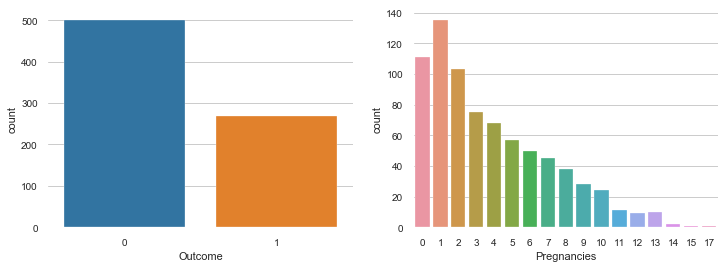

In [174]:
#Plotting the number of diabetic (1) and Non Diabetic (0) women. 
#Plotting number of pregnancies
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x='Outcome', data=data, ax=axes[0]);
sns.countplot(x='Pregnancies', data=data, ax=axes[1]);

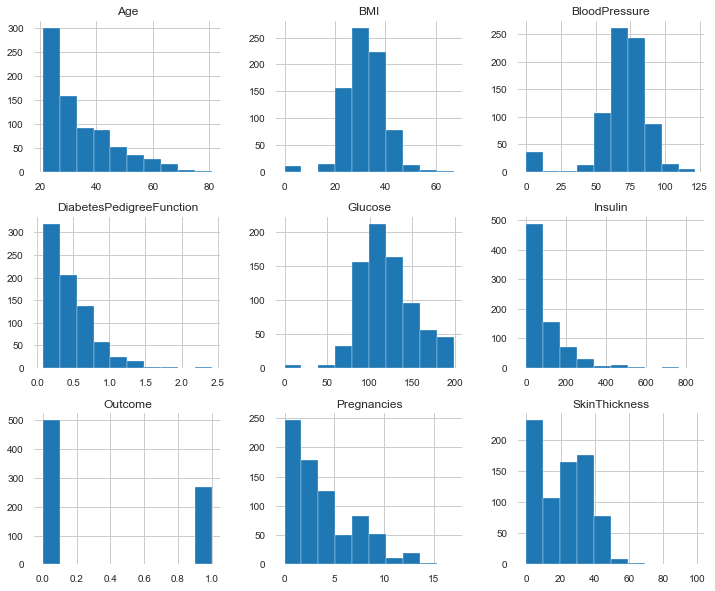

In [175]:
#Plots of all the variables
data.hist(figsize=(12, 10))

plt.show()

C:\Users\poornimaj\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


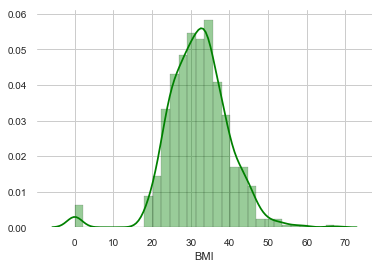

In [176]:
# BMI plot
sns.set_style('whitegrid')
#sns.countplot(x='Outcome', hue='Age', data=data)
sns.distplot(data['BMI'], kde=True, bins=30, color='Green',
            hist_kws={'edgecolor':'black'})

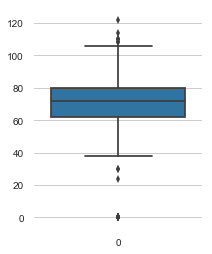

In [177]:
#BP plot
_, ax = plt.subplots(figsize=(3, 4))
sns.boxplot(data=data['BloodPressure'], ax=ax);

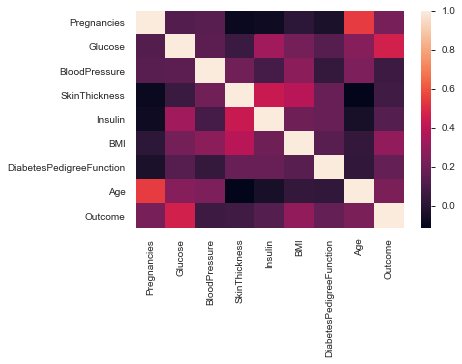

In [178]:
#look at the correlations among the numerical variables in our dataset. 
#This information is important to know as logistic regression does not handle highly correlated input variables well
#brighter colors indicate more correlation
corr_matrix = data.corr()
sns.heatmap(corr_matrix);

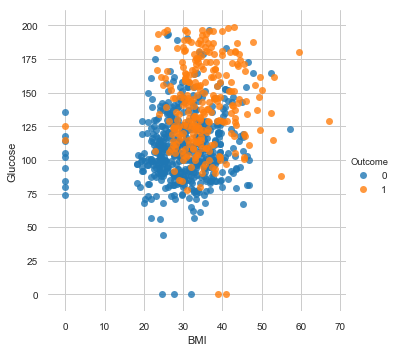

In [179]:
# Plot of BMI vs Glocose with Outcomes highlighted
sns.lmplot('BMI', 'Glucose', data=data, 
           hue='Outcome', fit_reg=False);

**4. Split the data into training set and testing set**

In [206]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
507,1,130,60,23,170,28.6,0.692,21
563,6,99,60,19,54,26.9,0.497,32
568,4,154,72,29,126,31.3,0.338,37
350,4,92,80,0,0,42.2,0.237,29
194,8,85,55,20,0,24.4,0.136,42


 **5. Logistic regression** 

In [219]:
lm = LogisticRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       115
           1       0.85      0.65      0.74        77

   micro avg       0.81      0.81      0.81       192
   macro avg       0.82      0.79      0.80       192
weighted avg       0.82      0.81      0.81       192



C:\Users\poornimaj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\poornimaj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**6. Display the coefficients and form the logistic regression equation**

In [218]:
df_coefs = pd.DataFrame(lm.coef_[0], index=X.columns, columns = ['Coefficient'])
df_coefs

,Coefficient
Pregnancies,0.105193
Glucose,0.025287
BloodPressure,-0.015191
SkinThickness,0.004364
Insulin,-0.000883
BMI,0.048385
DiabetesPedigreeFunction,0.588603
Age,0.001050


**7. Compute the accuracy and confusion matrix.**

In [222]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[106   9]
 [ 27  50]]
Accuracy: 0.8125
Precision: 0.847457627118644
Recall: 0.6493506493506493


**ROC Curve**

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lm.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**8. Plot the decision boundary.**

**9. Identify which of the following variables are positively associated with the target column.**

In [214]:
data.drop("Outcome", axis=1).apply(lambda x: x.corr(data.Outcome))
#data[data.columns[0:]].corr()['Outcome'][:]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
dtype: float64

All the variables seem to be positively associated with the target column

**10. For a woman aged 35 and mother of 2 children, predict and display the class, if her bmi was 35 instead of 24 according to the model?**